In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV

In [15]:
data=pd.read_csv('temperature.csv')
data.head(20)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [16]:
data.shape

(7752, 25)

In [17]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


### Checking for the null values

In [18]:
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

### Checking datatypes of the columns

In [19]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

### Handling the null values

In [20]:
data['station']=data['station'].fillna(data['station'].mode()[0])

In [21]:
data['Date']=data['Date'].fillna(data['Date'].mode()[0])

In [22]:
data['Present_Tmax']=data['Present_Tmax'].fillna(data['Present_Tmax'].mean())

In [23]:
data['LDAPS_CC1']=data['LDAPS_CC1'].fillna(data['LDAPS_CC1'].mean())

In [25]:
data['LDAPS_RHmin']=data['LDAPS_RHmin'].fillna(data['LDAPS_RHmin'].mean())

In [26]:
data['LDAPS_RHmax']=data['LDAPS_RHmax'].fillna(data['LDAPS_RHmax'].mean())

In [28]:
data['LDAPS_Tmax_lapse']=data['LDAPS_Tmax_lapse'].fillna(data['LDAPS_Tmax_lapse'].mean())

In [29]:
data['LDAPS_Tmin_lapse']=data['LDAPS_Tmin_lapse'].fillna(data['LDAPS_Tmin_lapse'].mean())

In [31]:
data['LDAPS_WS']=data['LDAPS_WS'].fillna(data['LDAPS_WS'].mean())

In [33]:
data['LDAPS_LH']=data['LDAPS_LH'].fillna(data['LDAPS_LH'].mean())

In [35]:
data['LDAPS_CC1']=data['LDAPS_CC1'].fillna(data['LDAPS_CC1'].mean())

In [37]:
data['LDAPS_CC2']=data['LDAPS_CC2'].fillna(data['LDAPS_CC2'].mean())

In [39]:
data['LDAPS_CC3']=data['LDAPS_CC3'].fillna(data['LDAPS_CC3'].mean())

In [40]:
data['LDAPS_CC4']=data['LDAPS_CC4'].fillna(data['LDAPS_CC4'].mean())

In [42]:
data['LDAPS_PPT1']=data['LDAPS_PPT1'].fillna(data['LDAPS_PPT1'].mean())

In [43]:
data['LDAPS_PPT2']=data['LDAPS_PPT2'].fillna(data['LDAPS_PPT2'].mean())

In [45]:
data['LDAPS_PPT3']=data['LDAPS_PPT3'].fillna(data['LDAPS_PPT3'].mean())

In [46]:
data['LDAPS_PPT4']=data['LDAPS_PPT4'].fillna(data['LDAPS_PPT4'].mean())

In [47]:
data['Next_Tmax']=data['Next_Tmax'].fillna(data['Next_Tmax'].mean())

In [49]:
data['Next_Tmin']=data['Next_Tmin'].fillna(data['Next_Tmin'].mean())

In [51]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,01-07-2013,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


### Let's see how data is distributed for each column

In [53]:
df=data.drop(columns='Date')

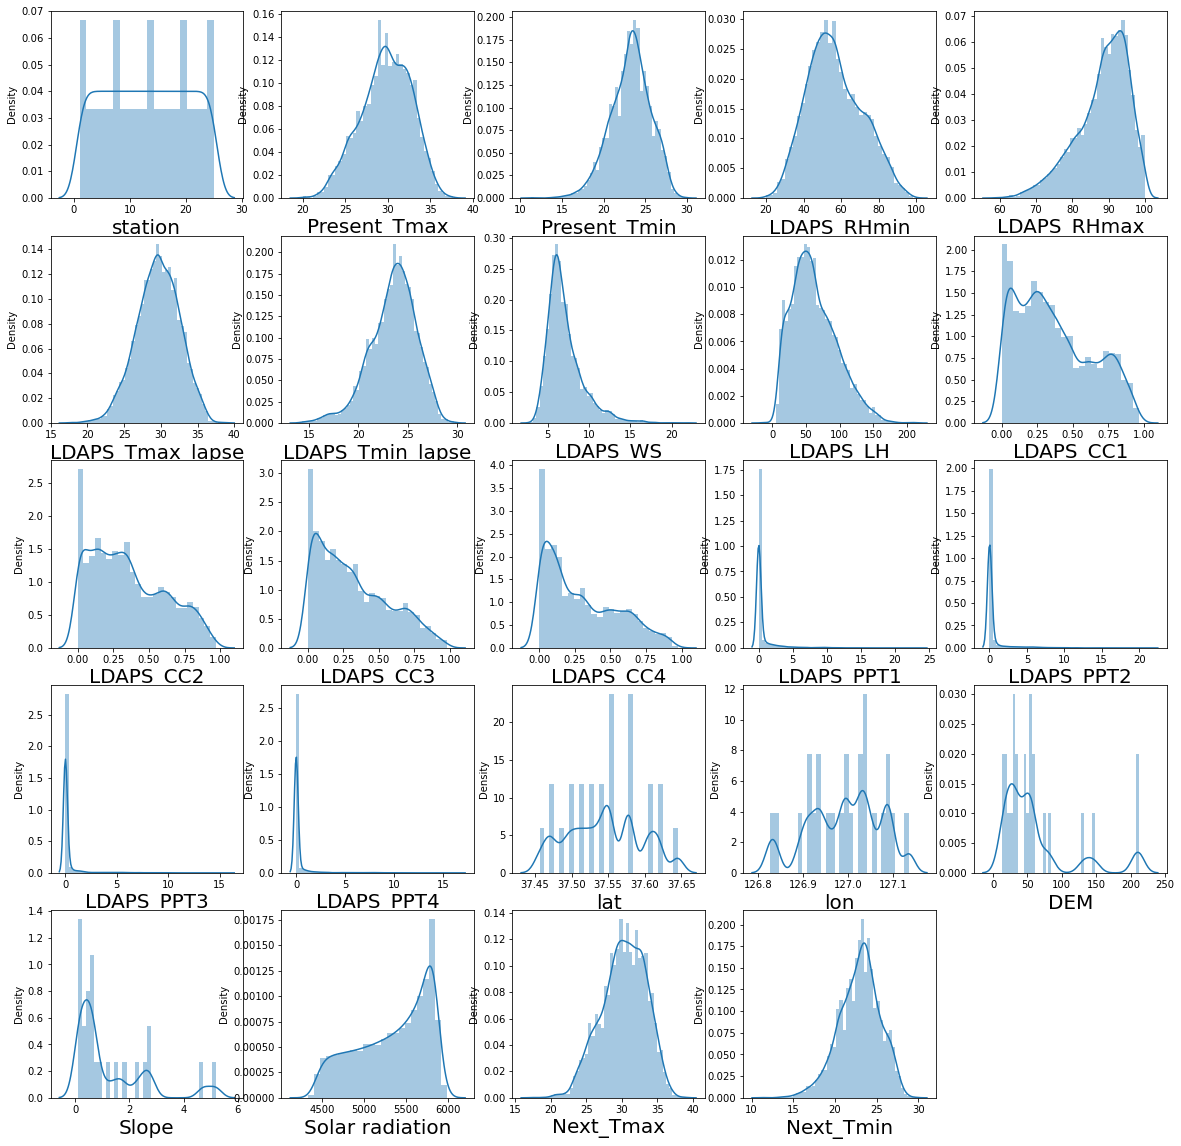

In [54]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


We have seen some skewness in some columns

### Encoding of the column

In [56]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data['Date']=enc.fit_transform(data['Date'].values.reshape(-1,1))

### Checking outliers using boxplot

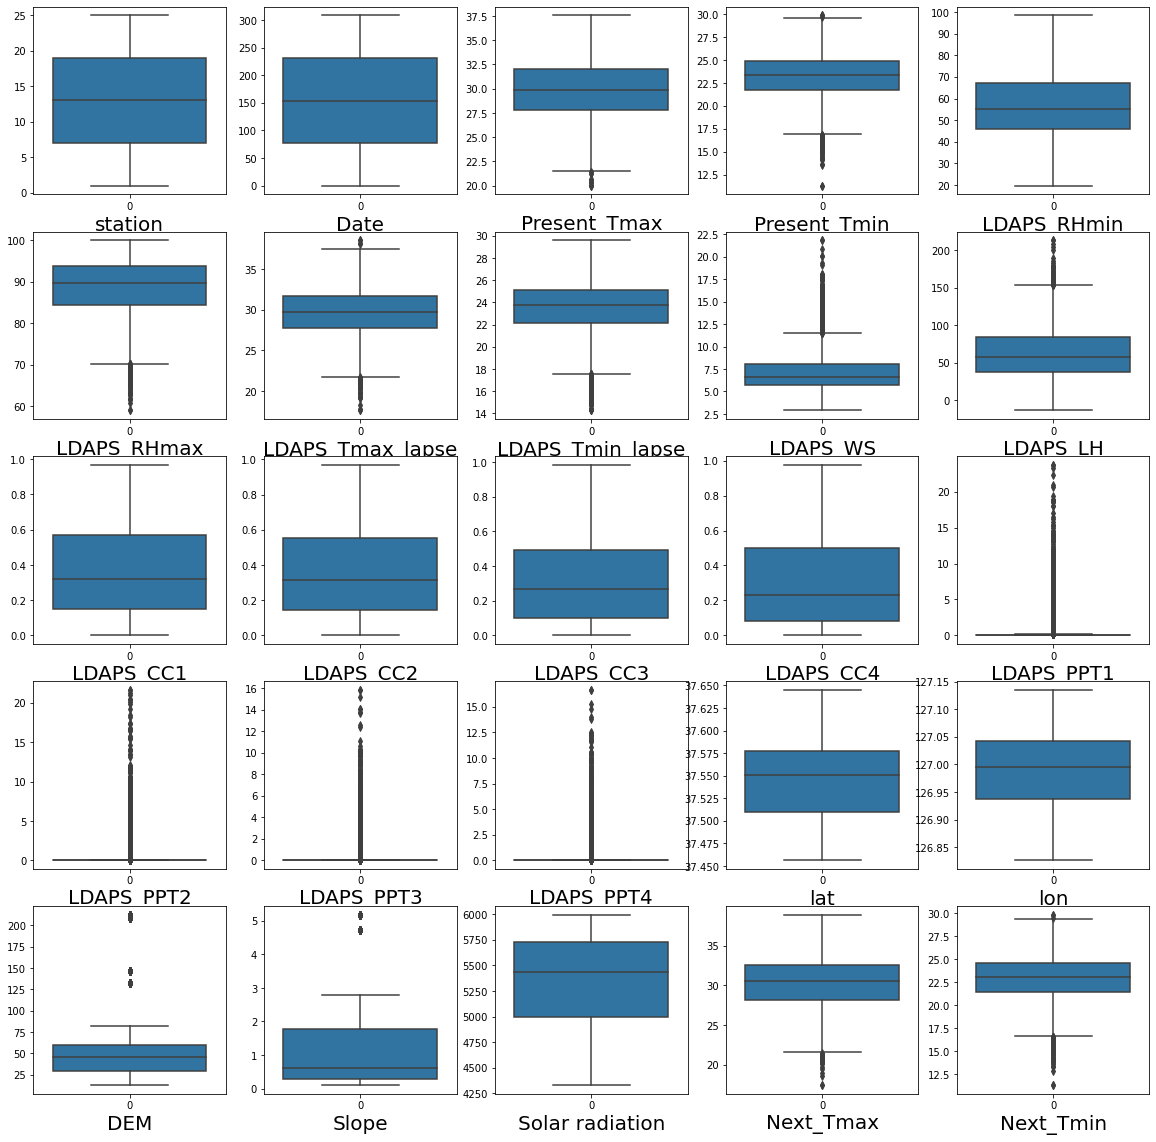

In [57]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(data=data[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We are not removing the outliers since the columns in which ouliers present are possible oucomes

## Taking Next_Tmax as the target variable

### Checking correlation

In [58]:
data.corr()['Next_Tmax']

station             0.108236
Date               -0.115928
Present_Tmax        0.610348
Present_Tmin        0.471806
LDAPS_RHmin        -0.437898
LDAPS_RHmax        -0.283738
LDAPS_Tmax_lapse    0.827189
LDAPS_Tmin_lapse    0.586983
LDAPS_WS           -0.342729
LDAPS_LH            0.157616
LDAPS_CC1          -0.452541
LDAPS_CC2          -0.490756
LDAPS_CC3          -0.514680
LDAPS_CC4          -0.446319
LDAPS_PPT1         -0.118817
LDAPS_PPT2         -0.178383
LDAPS_PPT3         -0.194143
LDAPS_PPT4         -0.178718
lat                -0.053510
lon                 0.003052
DEM                -0.172538
Slope              -0.102725
Solar radiation     0.008795
Next_Tmax           1.000000
Next_Tmin           0.621427
Name: Next_Tmax, dtype: float64

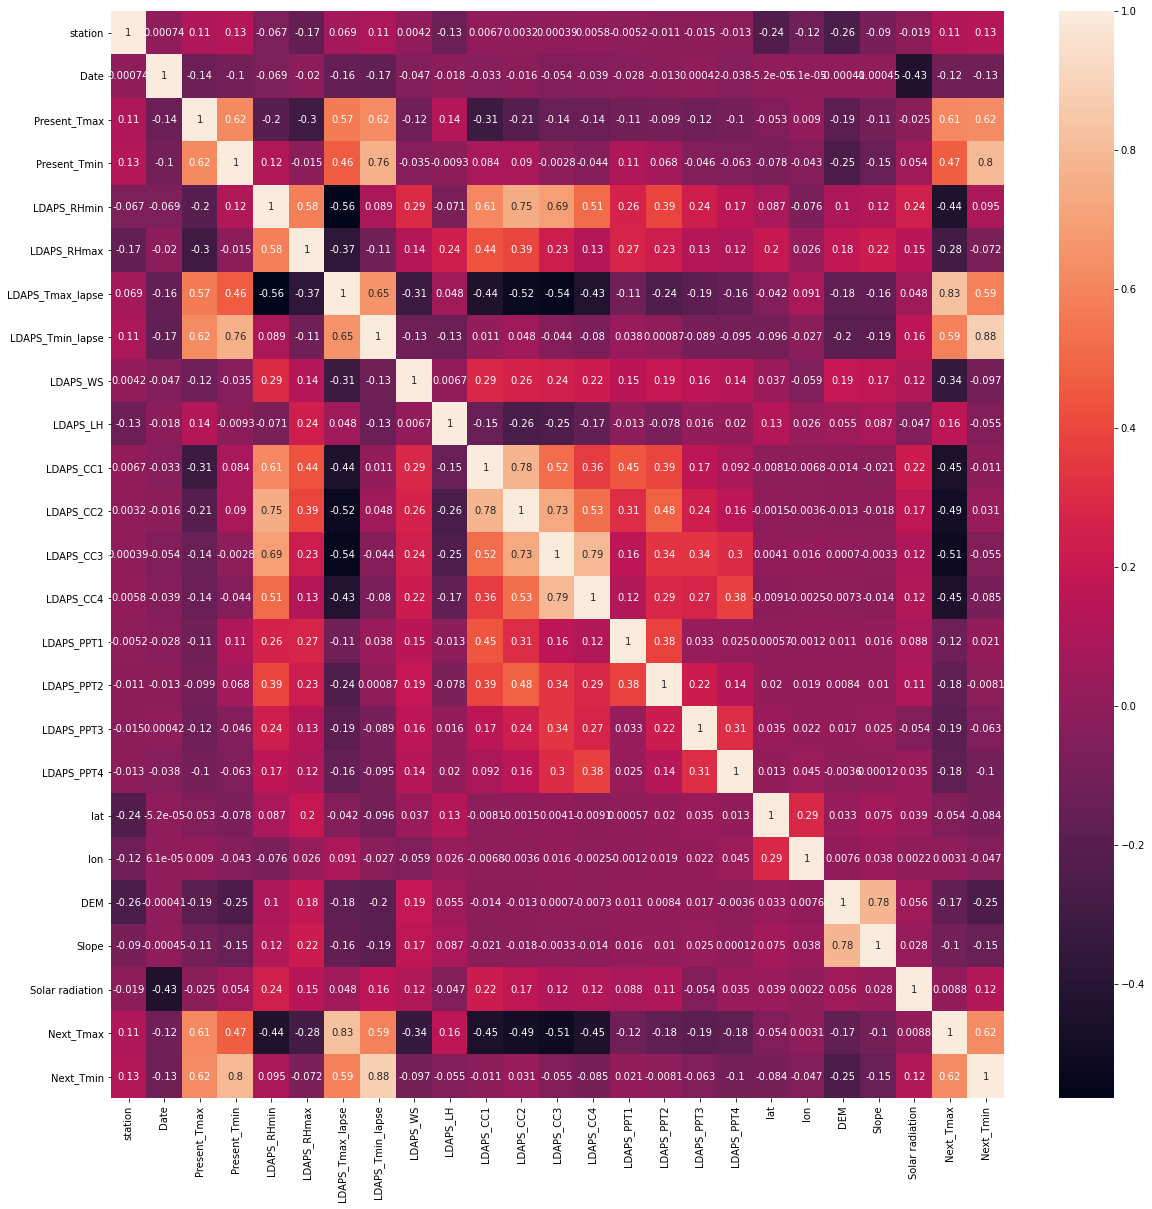

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Checking the columns which are positively and negatively correlated with the target variable

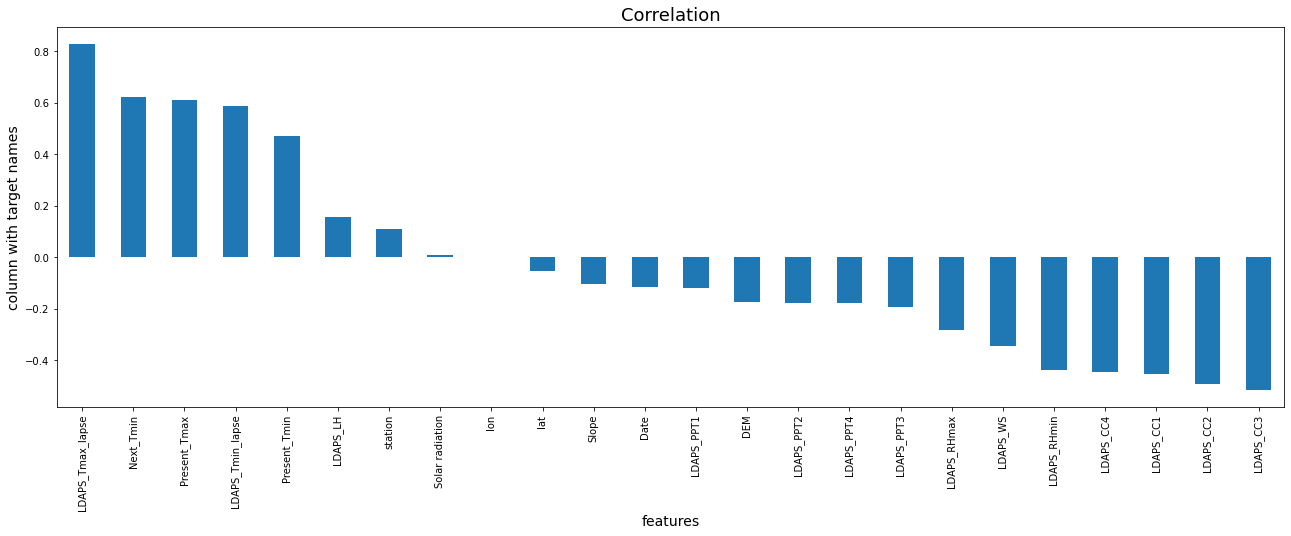

In [62]:
plt.figure(figsize=(22,7))
data.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar')
plt.xlabel('features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Removing columns which has less relation with the target variable

In [60]:
data_new=data.drop(columns=['Solar radiation','lon'])

### Dividing the dataset into Dependent and independent variables

In [63]:
x=data_new.drop(columns=['Next_Tmax'])
y=data_new['Next_Tmax']

In [64]:
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,DEM,Slope,Next_Tmin
0,1.0,290,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,212.3350,2.785000,21.2
1,2.0,290,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,44.7624,0.514100,22.5
2,3.0,290,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,33.3068,0.266100,23.9
3,4.0,290,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,45.7160,2.534800,24.3
4,5.0,290,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,35.0380,0.505500,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,304,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,15.5876,0.155400,18.1
7748,24.0,304,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,17.2956,0.222300,18.8
7749,25.0,304,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,19.5844,0.271300,17.4
7750,1.0,0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,12.3700,0.098475,11.3


In [65]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64

### Checking skewness

In [66]:
x.skew()

station             0.000100
Date                0.000009
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
DEM                 1.723257
Slope               1.563020
Next_Tmin          -0.404447
dtype: float64

### Removing skewness using power transform

In [67]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

### Scaling the data

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_new=sc.fit_transform(x_new)

### Checking Multicolinearity using VIF(variance inflation factor)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.204164,station
1,1.102117,Date
2,2.925109,Present_Tmax
3,3.409774,Present_Tmin
4,5.868614,LDAPS_RHmin
5,2.483151,LDAPS_RHmax
6,6.683909,LDAPS_Tmax_lapse
7,8.342287,LDAPS_Tmin_lapse
8,1.223354,LDAPS_WS
9,1.487174,LDAPS_LH


There is some multicollinearity found between columns so we have to remove them

In [72]:
x=x.drop(columns=['LDAPS_Tmax_lapse'])

In [73]:
x.skew()

station             0.000100
Date                0.000009
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
DEM                 1.723257
Slope               1.563020
Next_Tmin          -0.404447
dtype: float64

In [74]:
x_new=power_transform(x)

In [75]:
x_new=sc.fit_transform(x_new)

In [76]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.201676,station
1,1.057048,Date
2,2.905301,Present_Tmax
3,3.407367,Present_Tmin
4,3.929545,LDAPS_RHmin
5,2.457166,LDAPS_RHmax
6,5.432873,LDAPS_Tmin_lapse
7,1.192361,LDAPS_WS
8,1.478144,LDAPS_LH
9,4.589799,LDAPS_CC1


### Finding the best random state

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR=LinearRegression()
maxAccu=0
maxRS=0
for i in range(0,10000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.20,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    accu=r2_score(y_test,y_pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
print('Max accuracy is ',maxAccu,'on random state',maxRs)
    

Max accuracy is  0.782324821147719 on random state 3971


### Splitting data Into Training and test data

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.20,random_state=3971)

### Linear Regression

In [84]:
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print(r2_score(y_test,y_pred))

0.782324821147719


### Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,x_new,y,cv=4)
print(cv_score.mean())

0.6663601977390519


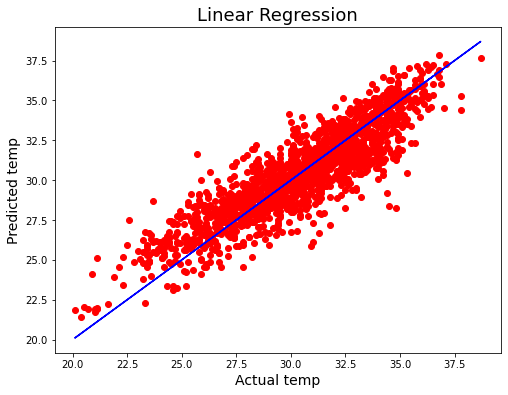

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual temp',fontsize=14)
plt.ylabel('Predicted temp',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### Regularization

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

### Lasso Regression

In [88]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'max_iter': 100, 'normalize': False, 'random_state': 0}


In [89]:
ls=Lasso(alpha=0.001,random_state=0,max_iter=100,normalize=False)
ls.fit(x_train,y_train)

Lasso(alpha=0.001, max_iter=100, random_state=0)

In [90]:
ls_pred=ls.predict(x_test)
lss=r2_score(y_test,ls_pred)
lss

0.782296629656239

#### Cross validation

In [91]:
cv_score_Lasso=cross_val_score(ls,x_new,y,cv=4)
print(cv_score_Lasso.mean())

0.6664377902299209


### Ridge Regression

In [92]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
Rg=Ridge()
clf=GridSearchCV(Rg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'max_iter': 100, 'normalize': False, 'random_state': 0}


In [93]:
Rgg=Ridge(alpha=10,random_state=0,max_iter=100,normalize=False)
Rgg.fit(x_train,y_train)

Ridge(alpha=10, max_iter=100, random_state=0)

In [94]:
Rg_pred=Rgg.predict(x_test)
Rgs=r2_score(y_test,Rg_pred)
Rgs

0.7823288175747121

#### Cross validation

In [95]:
cv_score_ridge=cross_val_score(Rgg,x_new,y,cv=4)
print(cv_score_ridge.mean())

0.6664911931874004


### Ensemble Technique

In [96]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [97]:
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [98]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)

RandomForestRegressor()

In [99]:
rf_pred=rf.predict(x_test)
rfs=r2_score(y_test,rf_pred)
rfs

0.9206962027999468

So we are choosing random forest regressor as the best model 

#### Saving the model

In [100]:
import pickle

In [101]:
filename='Temperature.pkl'
pickle.dump(rf,open(filename,'wb'))

## Taking Next_Tmin as target variable

### Checking correlation

In [102]:
data.corr()['Next_Tmin']

station             0.128659
Date               -0.126034
Present_Tmax        0.622741
Present_Tmin        0.796670
LDAPS_RHmin         0.095019
LDAPS_RHmax        -0.071997
LDAPS_Tmax_lapse    0.586868
LDAPS_Tmin_lapse    0.880176
LDAPS_WS           -0.096576
LDAPS_LH           -0.055440
LDAPS_CC1          -0.011028
LDAPS_CC2           0.031250
LDAPS_CC3          -0.054726
LDAPS_CC4          -0.085093
LDAPS_PPT1          0.021323
LDAPS_PPT2         -0.008058
LDAPS_PPT3         -0.062622
LDAPS_PPT4         -0.103682
lat                -0.083533
lon                -0.046603
DEM                -0.246906
Slope              -0.146882
Solar radiation     0.120212
Next_Tmax           0.621427
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

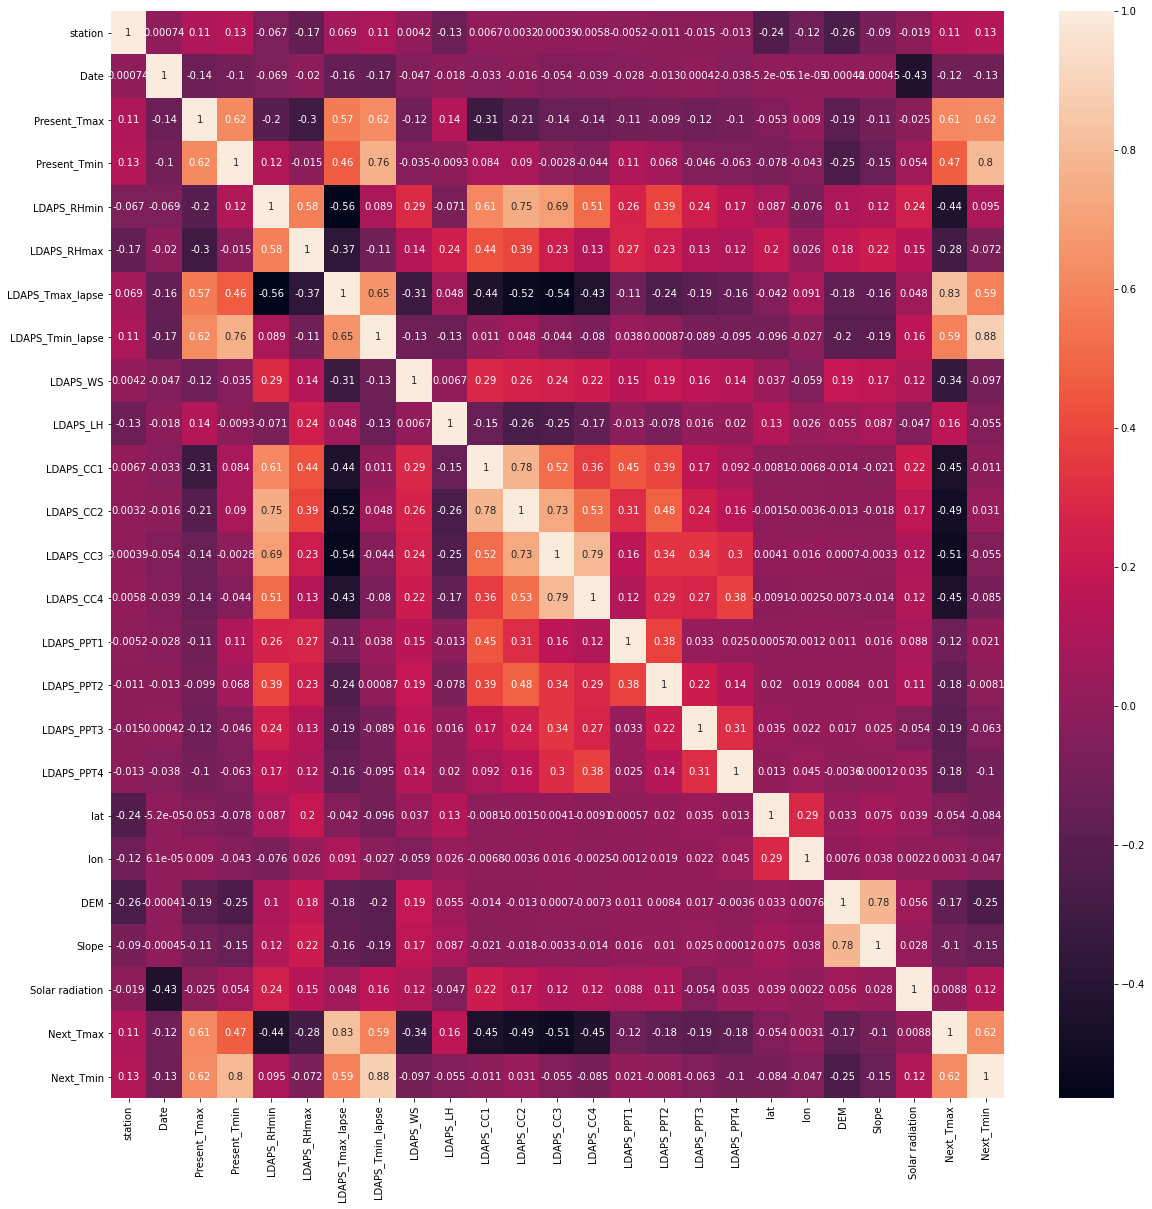

In [105]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Checking the columns which are positively and negatively correlated with the target variable

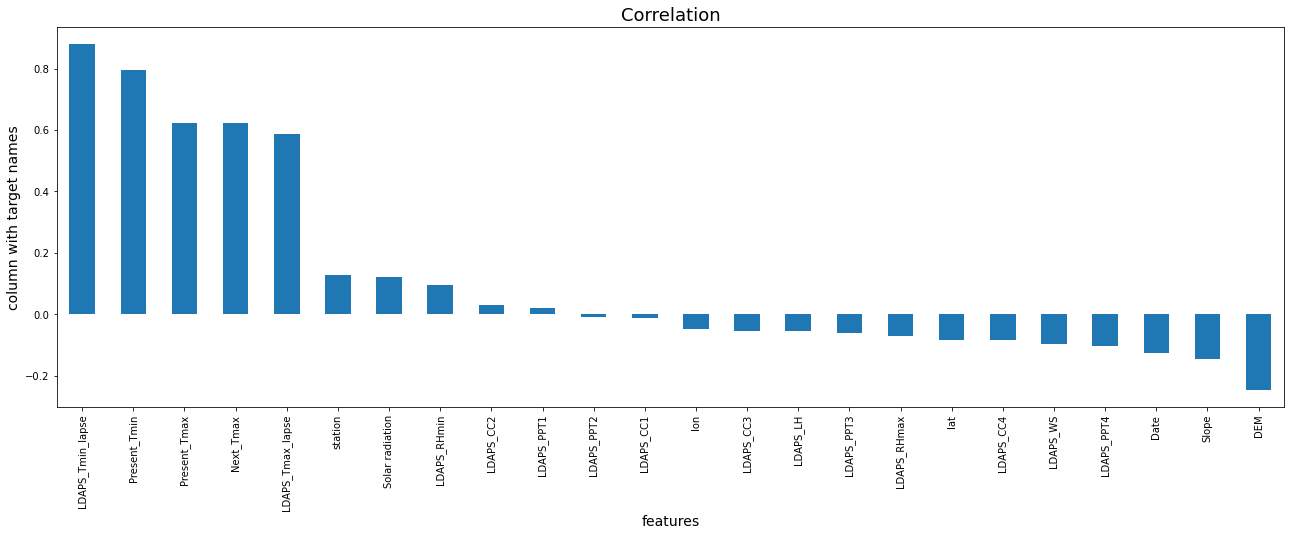

In [106]:
plt.figure(figsize=(22,7))
data.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar')
plt.xlabel('features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Removing columns which has less relationship with the target variable

In [108]:
data_n=data.drop(columns=['LDAPS_CC1','LDAPS_CC2','LDAPS_PPT1','LDAPS_PPT2'])

### Dividing the dataset into Dependent and independent variables

In [109]:
x=data_new.drop(columns=['Next_Tmin'])
y=data_new['Next_Tmin']

In [110]:
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,DEM,Slope,Next_Tmax
0,1.0,290,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,212.3350,2.785000,29.1
1,2.0,290,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,44.7624,0.514100,30.5
2,3.0,290,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,33.3068,0.266100,31.1
3,4.0,290,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,45.7160,2.534800,31.7
4,5.0,290,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,35.0380,0.505500,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,304,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,15.5876,0.155400,28.3
7748,24.0,304,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,17.2956,0.222300,28.6
7749,25.0,304,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,19.5844,0.271300,27.8
7750,1.0,0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,12.3700,0.098475,17.4


In [111]:
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: float64

### Checking skewness

In [112]:
x.skew()

station             0.000100
Date                0.000009
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
DEM                 1.723257
Slope               1.563020
Next_Tmax          -0.340200
dtype: float64

### Removing skewness using power transform

In [113]:
x_new=power_transform(x)

### Scaling the data

In [114]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)

### Checking Multicolinearity using VIF(variance inflation factor)

In [115]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.218579,station
1,1.094583,Date
2,2.983792,Present_Tmax
3,3.056145,Present_Tmin
4,5.886994,LDAPS_RHmin
5,2.479056,LDAPS_RHmax
6,8.071273,LDAPS_Tmax_lapse
7,6.910502,LDAPS_Tmin_lapse
8,1.253176,LDAPS_WS
9,1.510482,LDAPS_LH


There is some multicollinearity found between columns so we have to remove them

In [116]:
x=x.drop(columns=['LDAPS_Tmin_lapse'])

In [117]:
x_new=power_transform(x)

In [118]:
x_new=sc.fit_transform(x_new)

In [119]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.218224,station
1,1.088755,Date
2,2.727558,Present_Tmax
3,2.700226,Present_Tmin
4,4.134444,LDAPS_RHmin
5,2.420400,LDAPS_RHmax
6,4.728610,LDAPS_Tmax_lapse
7,1.247623,LDAPS_WS
8,1.424950,LDAPS_LH
9,4.503010,LDAPS_CC1


### Finding the best random state

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR=LinearRegression()
maxAccu=0
maxRS=0
for i in range(0,10000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.20,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    accu=r2_score(y_test,y_pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
print('Max accuracy is ',maxAccu,'on random state',maxRs)
    

Max accuracy is  0.8417063802447668 on random state 7905


### Splitting data Into Training and test data

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.20,random_state=7905)

### Linear Regression

In [122]:
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print(r2_score(y_test,y_pred))

0.8417063802447668


### Cross Validation

In [123]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,x_new,y,cv=4)
print(cv_score.mean())

0.7578126215505111


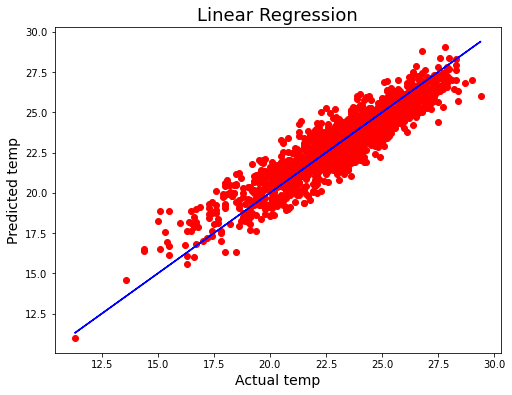

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual temp',fontsize=14)
plt.ylabel('Predicted temp',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### Lasso Regression

In [125]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'max_iter': 100, 'normalize': False, 'random_state': 0}


In [126]:
ls=Lasso(alpha=0.0001,random_state=0,max_iter=100,normalize=False)
ls.fit(x_train,y_train)

Lasso(alpha=0.0001, max_iter=100, random_state=0)

In [127]:
ls_pred=ls.predict(x_test)
lss=r2_score(y_test,ls_pred)
lss

0.8417224204002502

#### Cross Validation

In [128]:
cv_score_Lasso=cross_val_score(ls,x_new,y,cv=4)
print(cv_score_Lasso.mean())

0.7578147402150566


### Ridge Regression

In [129]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
Rg=Ridge()
clf=GridSearchCV(Rg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'max_iter': 100, 'normalize': False, 'random_state': 0}


In [130]:
Rgg=Ridge(alpha=10,random_state=0,max_iter=100,normalize=False)
Rgg.fit(x_train,y_train)

Ridge(alpha=10, max_iter=100, random_state=0)

In [131]:
Rg_pred=Rgg.predict(x_test)
Rgs=r2_score(y_test,Rg_pred)
Rgs

0.8417411906399025

#### Cross Validation

In [132]:
cv_score_ridge=cross_val_score(Rgg,x_new,y,cv=4)
print(cv_score_ridge.mean())

0.7578428819827061


### Ensemble Technique

In [133]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [134]:
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [135]:
rf=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt')

In [136]:
rf_pred=rf.predict(x_test)
rfs=r2_score(y_test,rf_pred)
rfs

0.9105441471654244

So we are choosing random forest regressor as the best model 

#### Saving the model

In [137]:
filename='Temperature2.pkl'
pickle.dump(rf,open(filename,'wb'))

## Documentaion

In [ ]:
Import the csv file then seen the data,we describe the data and check the shape of the dataset. 
Then we check for the null values in the columns and we dealt with that.
Then the vizualization of the  dataset is done and some skewness is found.
After we check for the outliers using boxplot and we found outliers in some columns but we didn't remove them since they are possible outcomes.
After that we checked correlation with the target variable ['Next_Tmax'] and remove columns['Solar radiation','lon'] since they have very less relation with the target variable.
After that we devide the dataset into Dependent and independent variables.
After that we checked for thr skewness and found some skewness and we removed it with the help of power transform function.
After that we checked for multicollinearity and it is found between the columns and remove the columns ['LDAPS_Tmax_lapse'] .
After that we trained the model with the several algorithms and found Random Forest regressor as the best algo for our model.
Atre that we saved the model.
Then we take the second Target Variable['Next_Tmin'].
After that we checked correlation with the target variable ['Next_Tmin'] and remove columns['LDAPS_CC1','LDAPS_CC2','LDAPS_PPT1','LDAPS_PPT2'] since they have very less relation with the target variable.
After that we devide the dataset into Dependent and independent variables.
After that we checked for thr skewness and found some skewness and we removed it with the help of power transform function.
After that we checked for multicollinearity and it is found between the columns and remove the columns ['LDAPS_Tmin_lapse'] .
After that we trained the model with the several algorithms and found Random Forest regressor as the best algo for our model.
Atre that we saved the model.